In [ ]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

In [ ]:
Adj(1e-9,45,100000)

(144, 1296000000)

# 100nano

3 times appart

In [ ]:
full_cycle = 11e-3
loop_number = 8000
part_cycle = full_cycle / loop_number
part_cycle

1.375e-06

In [ ]:
interval = part_cycle * 1e9 #nano
interval

1375.0

In [ ]:
cycle_time = 11e-3
comp_time = cycle_time * 2
mod = 1/comp_time
mod

45.45454545454546

In [ ]:
samples = int(2972160000 * part_cycle)
samples

4086

In [ ]:
samples/48

85.125

In [ ]:
sam = Granularity(samples)
sam

4128

In [ ]:
interval = cycle_time*1e3
interval #mili

11.0

90Hz

In [ ]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

divide cycle time in N parts

In [ ]:
cycle_nano = cycle_time *1e9

In [ ]:
cycle_nano

5555555.555555556

In [ ]:
cycle_nano/8000

694.4444444444445

In [ ]:
loop_100nano = 8000

In [ ]:
interval = (cycle_nano) /loop_100nano

In [ ]:
interval

694.4444444444445

In [ ]:
interval*loop_100nano

5555555.555555556

In [ ]:
samples = int(2972160000 * (interval *1e-9))

In [ ]:
samples

2133

In [ ]:
samples/48

44.4375

In [ ]:
sam = Granularity(samples)

In [ ]:
sam

2160

In [ ]:
Sr = 2972160000
sam = 2064

tim = sam/Sr

In [ ]:
tim

0.005555555555555556

In [ ]:
interval = tim*1e9 #nano

In [ ]:
interval

694.4444444444445

# AWG and Pulse files setup

In [ ]:
AWG_Settings_100nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':2972160000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\100nano'
}

In [ ]:
M8190A = VisaR(AWG_Settings_100nano,60000)

In [ ]:
M8190A.write('FREQ:RAST 2972160000')

21

In [ ]:
Initialization(M8190A,AWG_Settings_100nano)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [ ]:
Pump_100nano = {
    'Name':'Pump_100nano',
    'Amplitude': 50,
    'Start time':500,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
ProbeA_100nano = {
    'Name':'ProbeA_100nano',
    'Amplitude':20,
    'Start time':100,
    'End time':900,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [ ]:
ProbeB_100nano= {
    'Name':'ProbeB_100nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
PulseScheme_A_100nano =  {
    'Name' : 'PulseScheme_A_100nano',
    'Pulse Scheme': [Pump_100nano,ProbeA_100nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100nano'
}

In [ ]:
PulseScheme_B_100nano =  {
    'Name' : 'PulseScheme_B_100nano',
    'Pulse Scheme': [ProbeB_100nano,ProbeB_100nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100nano'
}

In [ ]:
93

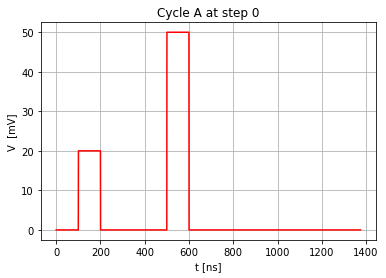

In [ ]:
step = 0
pul1 = Sweep_teil(PulseScheme_A_100nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100 nano 45 Hz mod , 3 appart, {a} step.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'], a = step),bbox_inches='tight')

In [ ]:
sweeping_run_a_100nano = Sweeping_Single_List_File_teil(PulseScheme_A_100nano,30,interval,sam,0,30,AWG_Settings_100nano,'A')[0]

In [ ]:
sweeping_run_b_100nano = Sweeping_Single_List_File_teil(PulseScheme_B_100nano,30,interval,sam,0,30,AWG_Settings_100nano,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_45Hz_100nano_2972160000.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100nano, k)


with open(r"{dict}\cycleB_31steps_45Hz_100nano_2972160000.p".format(dict = PulseScheme_B_100nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100nano, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_45Hz_100nano_2972160000.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as j:
    sweeping_runa_100nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_45Hz_100nano_2972160000.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as f:
    sweeping_runb_100nano= pickle.load(f)

In [ ]:
sweeping_runa_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_4128_30.csv'

In [ ]:
sweeping_run_b_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
loop_100nano

8000

In [ ]:
Sequence_File(M8190A,sweeping_runa_100nano['Pulse File Location, at step 30'],sweeping_runb_100nano['Pulse File Location, at step 30'],8000)

Sequence loaded with the following segment data "1,8000,0,1,0,4127,2,8000,0,1,0,4127" and the advancement method is COND


0

# Loading

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '45Hz'
}

In [ ]:
playingtime = 20

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_runa_100nano,sweeping_runb_100nano,PulseScheme_A_100nano['Measurement file Path'],Lock_In_Settings,8000)

Sequence loaded with the following segment data "1,8000,0,1,0,4127,2,8000,0,1,0,4127" and the advancement method is COND
Average Value for measurement at step 0 is 0.7377616609721178 V
Sequence loaded with the following segment data "1,8000,0,1,0,4127,2,8000,0,1,0,4127" and the advancement method is COND
Average Value for measurement at step 1 is 0.7383131692163535 V
Sequence loaded with the following segment data "1,8000,0,1,0,4127,2,8000,0,1,0,4127" and the advancement method is COND
Average Value for measurement at step 2 is 0.739724363285737 V
Sequence loaded with the following segment data "1,8000,0,1,0,4127,2,8000,0,1,0,4127" and the advancement method is COND
Average Value for measurement at step 3 is 0.7382875748089949 V
Sequence loaded with the following segment data "1,8000,0,1,0,4127,2,8000,0,1,0,4127" and the advancement method is COND
Average Value for measurement at step 4 is 0.7389417121843237 V
Sequence loaded with the following segment data "1,8000,0,1,0,4127,2,8000,0,

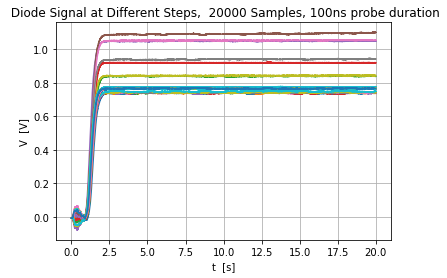

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 100ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 100 nano,31 steps, 45 Hz no legend, .jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-400,400,31)

In [ ]:
%matplotlib widget

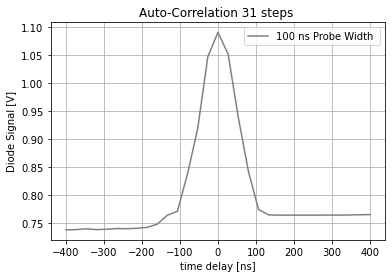

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'100 ns Probe Width ',color='grey')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps 100nano 45Hz length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))